In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

title = "Data cleaning of applications (2007 - 2018)"
os.getcwd()

data = np.genfromtxt('./applications-registered-for-resale-flats-and-rental-flats.csv', delimiter=",", skip_header=1, dtype=[('financial_year', 'U10'), ('type', 'U50'), ('applications_registered', 'i8')])
# print(data)

In [7]:
labels = list(set(data['type']))

print(labels)

typesNumberedCategories = np.arange(0,len(labels))
# print(typesNumberedCategories)
types_values = data[['type','applications_registered']]
# print(types_values)
applicationsCount = types_values['applications_registered']
# print(applicationsCount)

applicationsCount_rental = applicationsCount[types_values ['type'] == 'rental']
print(applicationsCount_rental)
applicationsCount_resale = applicationsCount[types_values ['type'] == 'resale']
print(applicationsCount_resale)

applicationsCount_combined =[applicationsCount_rental, applicationsCount_resale,]
print(applicationsCount_combined)
print(len(applicationsCount_combined))


['rental', 'resale']
[5970 3695 2681 2736 4918 4886 4612 4001 4309 4336 4753 4770]
[29612 28551 39320 30061 24331 23579 17552 17673 19620 20894 22005 23476]
[array([5970, 3695, 2681, 2736, 4918, 4886, 4612, 4001, 4309, 4336, 4753,
       4770]), array([29612, 28551, 39320, 30061, 24331, 23579, 17552, 17673, 19620,
       20894, 22005, 23476])]
2


dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])


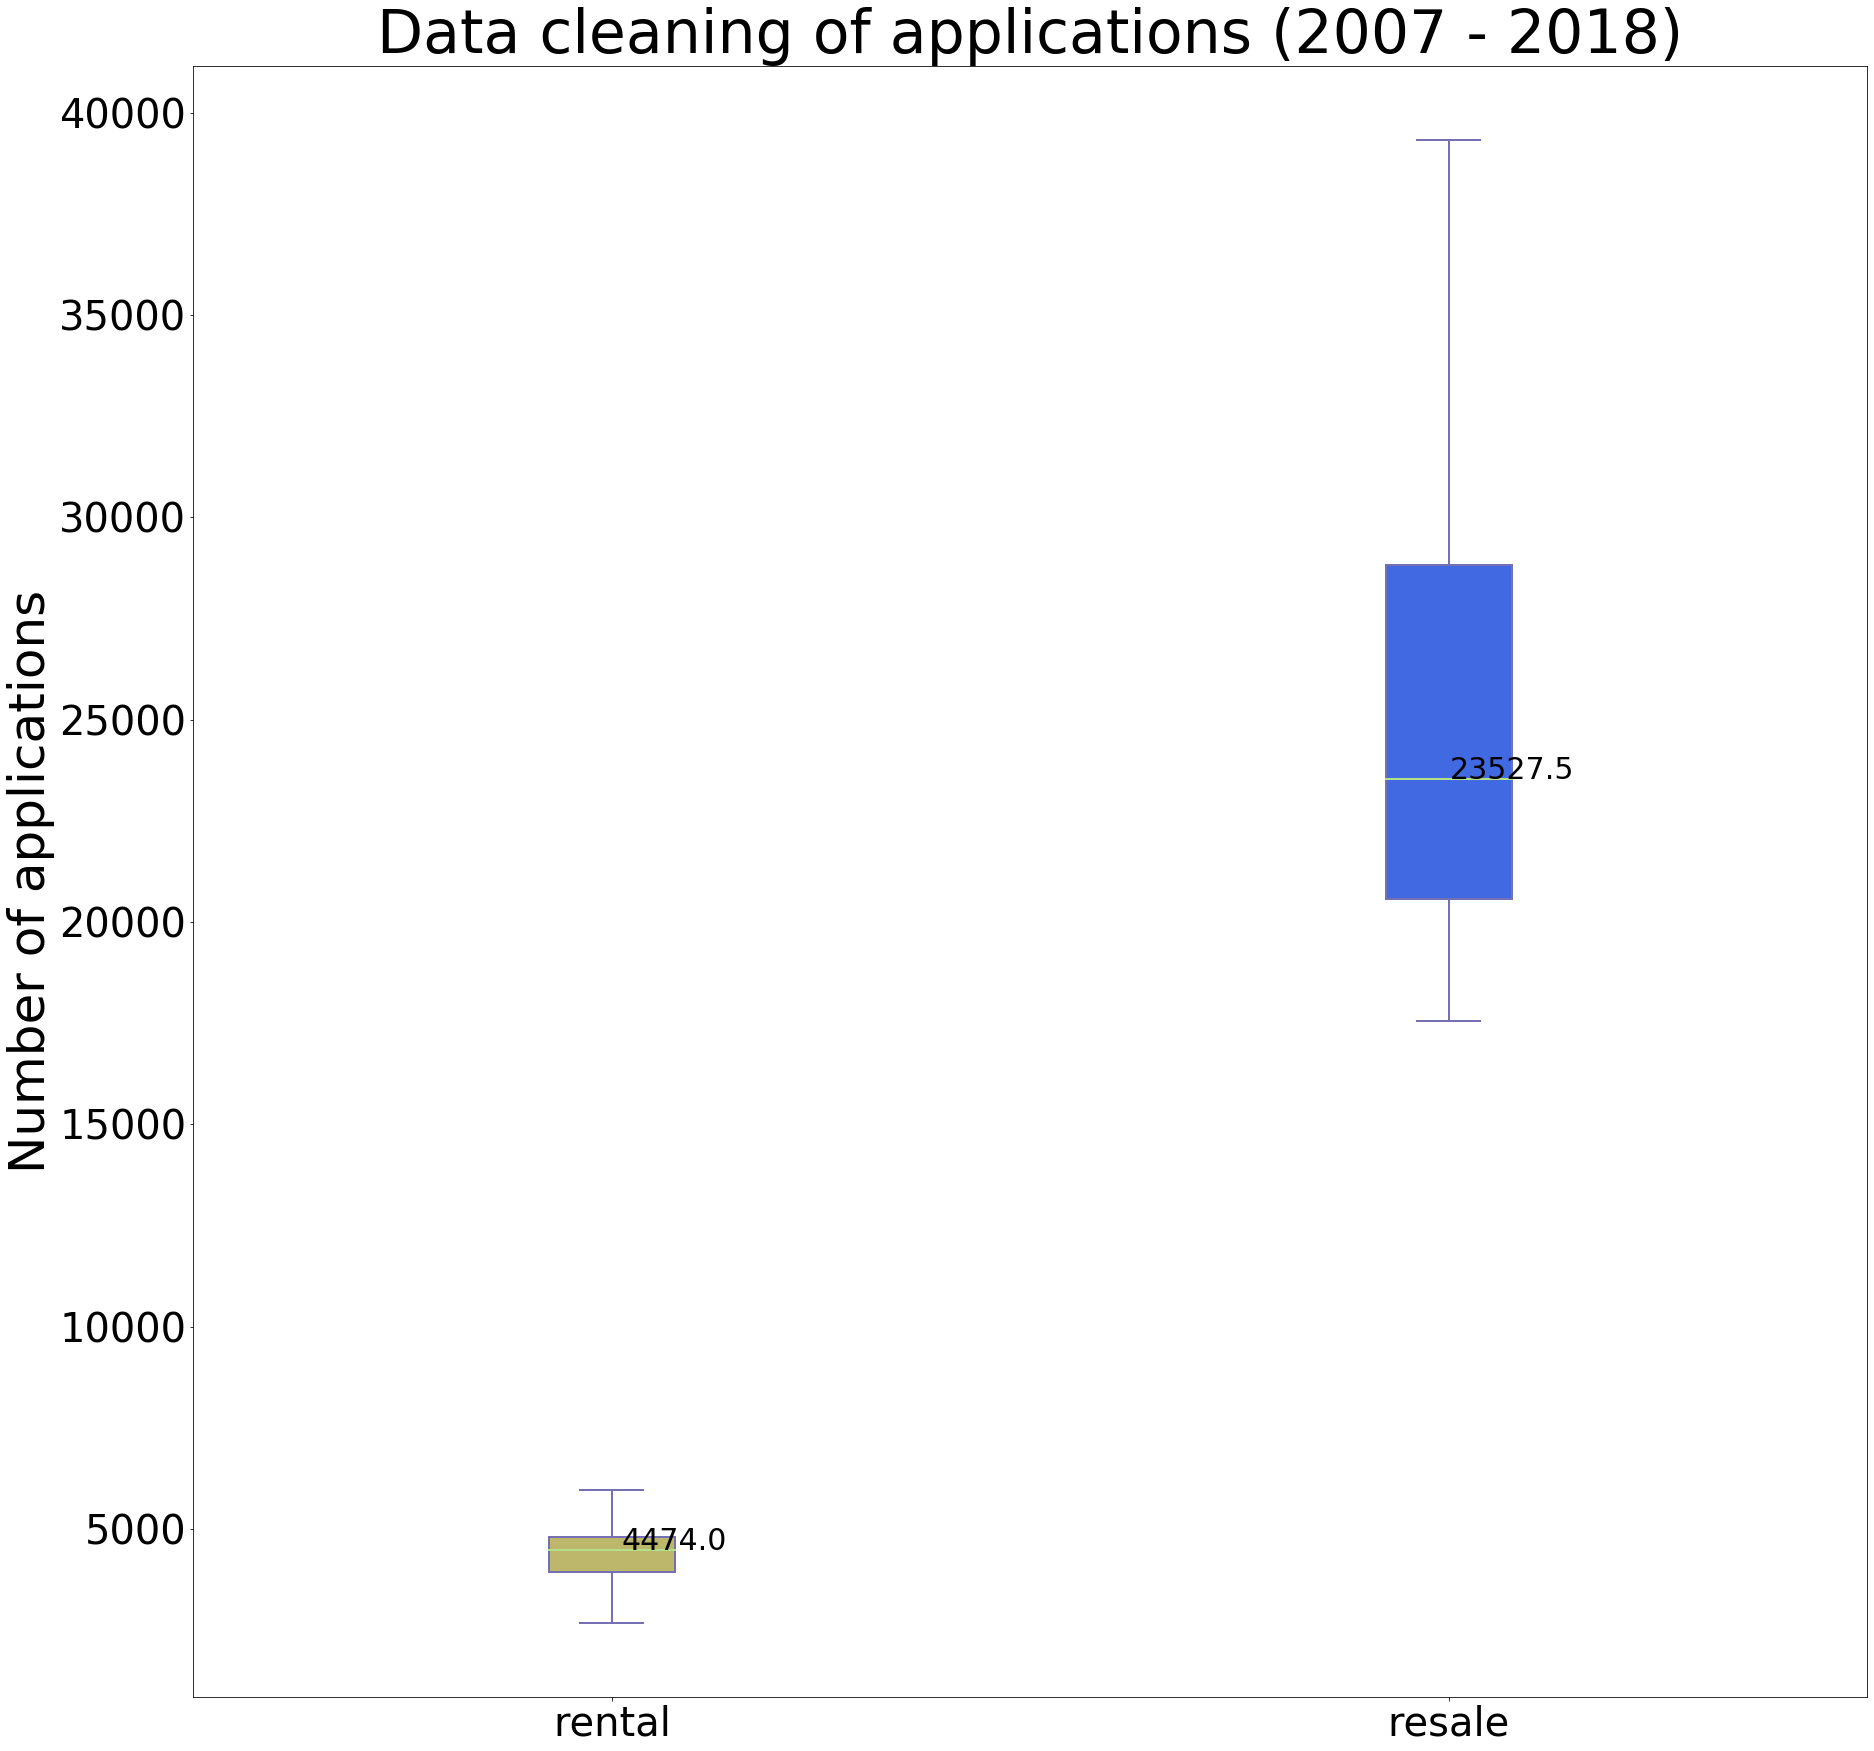

In [8]:
plt.figure(2, figsize=(30,30))
plt.title(title,fontsize=60)
plt.ylabel('Number of applications',fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40,rotation='horizontal')
bp_dict = plt.boxplot(applicationsCount_combined,labels=labels,patch_artist=True)

box_colors = ['darkkhaki', 'royalblue']
for box in bp_dict['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    # for i in range(len(applicationsCount_combined)):
    box.set( facecolor = box_colors[bp_dict['boxes'].index(box)])
## change color and linewidth of the whiskers
for whisker in bp_dict['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp_dict['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp_dict['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp_dict['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)

print(bp_dict.keys())

for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, '%.1f' % y,
         horizontalalignment='center',fontsize=30) # draw above, centered

fliers = []
for line in bp_dict['fliers']:
    ndarray = line.get_xydata()
    if (len(ndarray)>0):
       max_flier = ndarray[:,1].max()
       max_flier_index = ndarray[:,1].argmax()
       x = ndarray[max_flier_index,0]
       print("Flier: " + str(x) + "," + str(max_flier))
     
       plt.text(x,max_flier,'%.1f' % max_flier,horizontalalignment='center',fontsize=30,color='green') 

plt.show()
